# Test deepFEPE dataloader
- Unit test

In [1]:
import os
import sys
# add your module path
module_path = os.path.abspath(os.path.join('..')) # '.'
if module_path not in sys.path:
    sys.path.append(module_path)
# change your base path
os.chdir('../') # '../'
print(os.getcwd())

/home/yoyee/Documents/deepSfm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import logging
import yaml
from deepFEPE.utils.loader import dataLoader

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logging.info('train on device: %s', device)
config_file = 'deepFEPE/configs/kitti_corr_baseline.yaml' ## kitti
config_file = 'deepFEPE/configs/apollo_train_corr_baseline.yaml' ## apollo
with open(config_file, 'r') as f:
    config = yaml.load(f)

val = 'val' 
data = dataLoader(config, dataset='kitti_odo_corr', val=val, warp_input=True, val_shuffle=False)
train_loader, val_loader = data['train_loader'], data['val_loader']
logging.info('+++[Dataset]+++ train split size %d in %d batches, val split size %d in %d batches'%\
    (len(train_loader)*config['data']['batch_size'], len(train_loader), len(val_loader)*config['data']['batch_size'], len(val_loader)))

2020-07-15 15:50:37 meng-Alienware root[7899] INFO train on device: cuda
/home/yoyee/miniconda3/envs/py36-deepsfm/lib/python3.6/site-packages/ipykernel_launcher.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  
2020-07-15 15:50:37 meng-Alienware root[7899] INFO ===[Data]=== Resizing to [H600, W800]
2020-07-15 15:50:37 meng-Alienware root[7899] INFO use size: [600, 800] for vertual points
2020-07-15 15:50:37 meng-Alienware root[7899] INFO Crawling folders for 117 frames...
  0%|          | 0/1 [00:00<?, ?it/s]

frames: [Path('./deepFEPE/datasets/apollo/apollo_dump/train_seq_1/train/Road11_5'), '000001']
cam_id: _5


100%|██████████| 117/117 [00:00<00:00, 1752.05it/s]
2020-07-15 15:50:38 meng-Alienware root[7899] INFO Creating val loader with 2 workers...
2020-07-15 15:50:38 meng-Alienware root[7899] INFO ===[Data]=== Resizing to [H600, W800]
2020-07-15 15:50:38 meng-Alienware root[7899] INFO use size: [600, 800] for vertual points
2020-07-15 15:50:38 meng-Alienware root[7899] INFO Crawling folders for 459 frames...
100%|██████████| 459/459 [00:00<00:00, 4914.69it/s]
2020-07-15 15:50:38 meng-Alienware root[7899] INFO Creating train loader with 2 workers...
2020-07-15 15:50:38 meng-Alienware root[7899] INFO +++[Dataset]+++ train split size 468 in 39 batches, val split size 120 in 10 batches


frames: [Path('./deepFEPE/datasets/apollo/apollo_dump/train_seq_1/train/Road11_5'), '000000']
cam_id: _5


### Visualize one sample

In [29]:
for i, sample in enumerate(train_loader):
    if i > 1: break

base_seed = 1415258090, workder_id = 0
base_seed = 850354767, workder_id = 1


relative_scene_poses: tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]))
K: tensor([[544.8104,   0.0000, 398.6378],
        [  0.0000, 510.5260, 299.9966],
        [  0.0000,   0.0000,   1.0000]]))
imgs: torch.Size([600, 800, 3]))


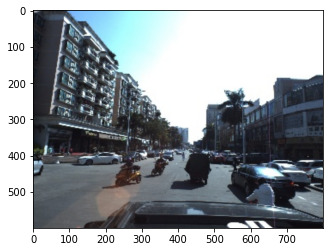

In [30]:
list(sample)
import matplotlib.pyplot as plt
import numpy as np
def check_sample(sample, idx=0):
    print(f"relative_scene_poses: {sample['relative_scene_poses'][0][idx]})")
    print(f"K: {sample['K'][idx]})")
    print(f"imgs: {sample['imgs'][0][idx].shape})")
    plt.imshow(sample['imgs'][0][idx].numpy().astype(np.int32))
    plt.show()
#     plt.imshow(sample['imgs'][1]) 
#     plt.show()
check_sample(sample)